# ----------LAB 11----------(Lab 12 below)

In [1]:
#Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 'last_evaluation': 'evaluation',
                        'number_project': 'projectCount', 'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany', 'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion', 'sales' : 'department',
                        'left' : 'turnover'})
df.head()


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### ----------Milestone 1----------

In [7]:
print(df.shape)
print(df.dtypes)
df.describe()

(14999, 10)
turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [8]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [9]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### ----------Milestone 2----------

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


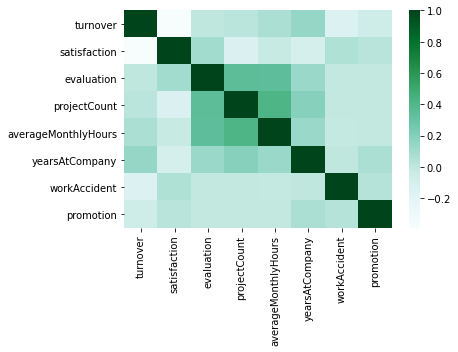

In [10]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="BuGn")
corr

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

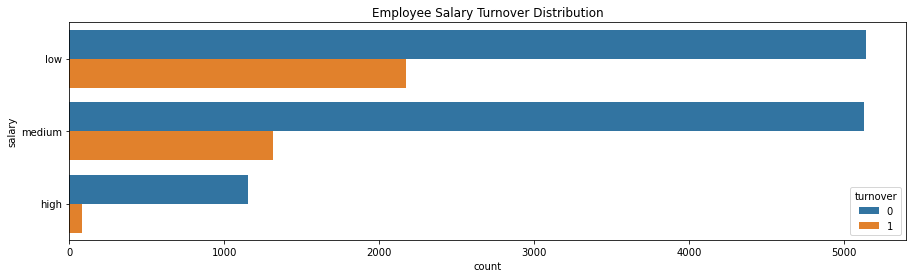

In [11]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution')

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

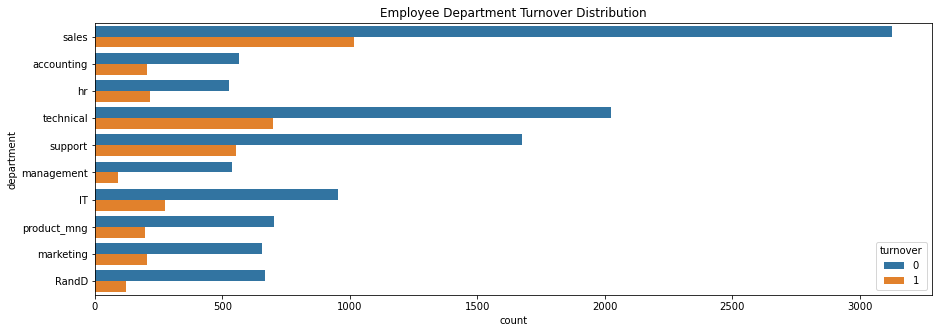

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

[Text(0, 0.5, 'Percent')]

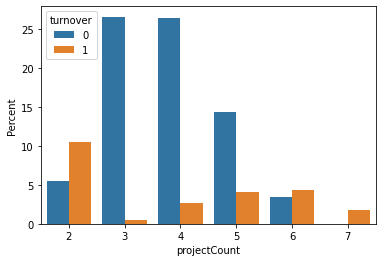

In [13]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df,
                 estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

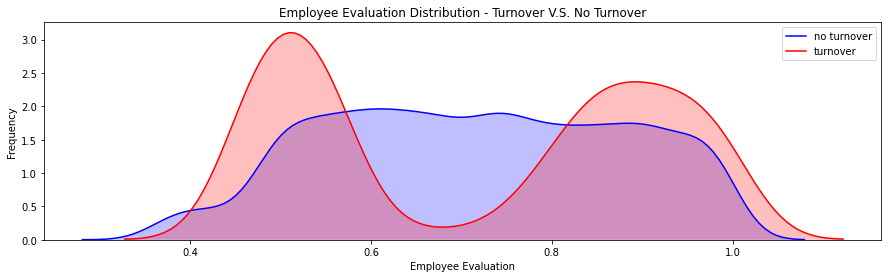

In [14]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

### ----------Milestone 3----------

# ---------------LAB 12---------------

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

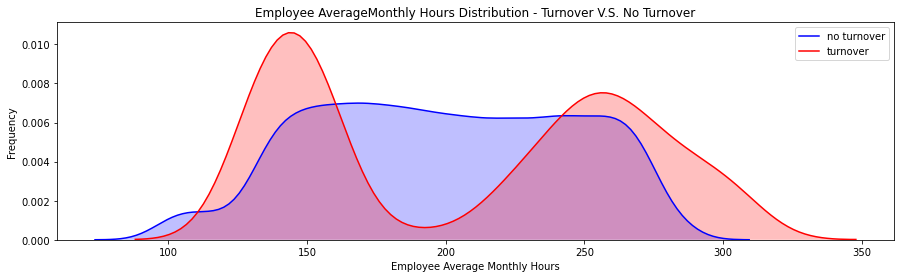

In [15]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0), 'averageMonthlyHours'] ,
               color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1), 'averageMonthlyHours'] ,
               color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

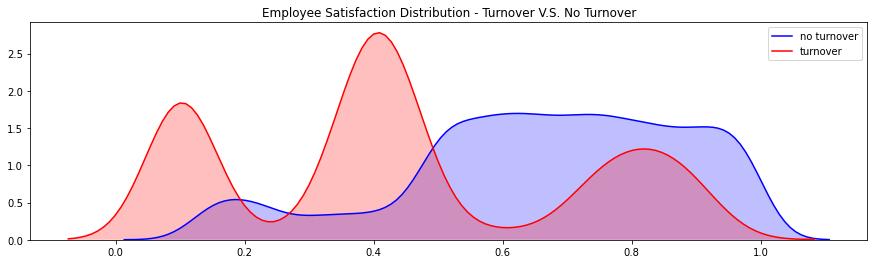

In [16]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] ,
               color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] ,
               color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

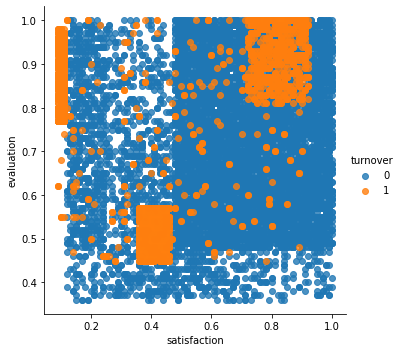

In [17]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')

### ----------Milestone 1----------

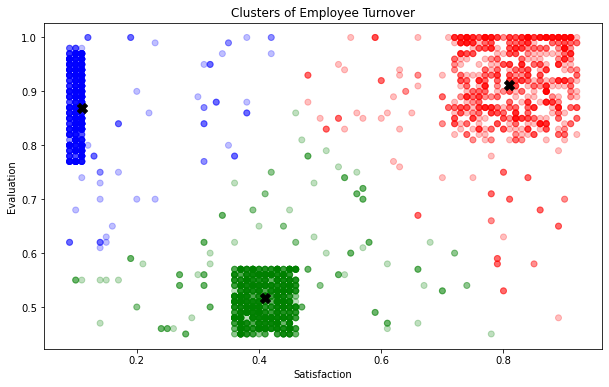

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
            color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

### ----------Milestone 2----------

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced",
                                    min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

In [36]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names =X.columns)
dotfile.close()

In [37]:
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced",
                                    min_weight_fraction_leaf=0.01)

### ----------Milestone 3----------